# Working with 2-node Network Data Sets
### The p < 0.05 Team - Haig Bedros, Noori Selina, Julia Ferris, Matthew Roland

### DAVIS SOUTHERN CLUB WOMEN

### BACKGROUND 
These data were collected by Davis et al in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise.

In [24]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import math
import pandas as pd

### Loading the Dataset

First, we load the Davis Southern Women dataset using NetworkX. This dataset represents the attendance of 18 women at 14 social events. The data is structured as a bipartite graph, with one set of nodes representing women and the other set representing events.

In [25]:
# Load the dataset
g = nx.davis_southern_women_graph()

# Seperating the nodes into two sets: women and clubs
women = g.graph['top']
clubs = g.graph['bottom']

### Biadjacency matrix
The biadjacency matrix shows the connections between women and events. Each row represents a woman, and each column represents an event. If a woman attended an event, the corresponding cell in the matrix has a 1; otherwise, it has a 0.

In [26]:

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(g, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


### Data set information
Here are soome basic information about the graph, including the number of nodes, edges, women, and events. 
This helps us understand the structure of the dataset.

Since the number of events is not directly available in the data set as an attribute we can get it by subtracting the set of women nodes from the total set of nodes in the graph. This leaves us with only the event nodes which is 14 evetnts.

In [27]:
# basic information
print("Number of nodes:", g.number_of_nodes())
print("Number of edges:", g.number_of_edges())
print(f"Number of women: {len(women)}")

women = {n for n, d in g.nodes(data=True) if d['bipartite'] == 0}
events = set(g) - women
print(f"Number of events: {len(events)}")

Number of nodes: 32
Number of edges: 89
Number of women: 18
Number of events: 14


### Creating the Bipartite Graph

In this section, we project the bipartite graph onto the women nodes. This means we create a new graph where nodes represent women, and edges represent shared event attendance between them. 

We do this in two ways: without weighting and with weighting based on the number of shared events.


#Friends, Member
16 Dorothy Murchison
16 Katherina Rogers
11 Charlotte McDowd
17 Nora Fayette
16 Pearl Oglethorpe
15 Laura Mandeville
12 Flora Price
17 Theresa Anderson
17 Verne Sanderson
17 Ruth DeSand
16 Myra Liddel
15 Frances Anderson
17 Evelyn Jefferson
17 Sylvia Avondale
12 Olivia Carleton
17 Helen Lloyd
15 Eleanor Nye
15 Brenda Rogers

#Friend meetings, Member
24 Dorothy Murchison
37 Katherina Rogers
24 Charlotte McDowd
43 Nora Fayette
31 Pearl Oglethorpe
45 Laura Mandeville
14 Flora Price
57 Theresa Anderson
38 Verne Sanderson
40 Ruth DeSand
33 Myra Liddel
32 Frances Anderson
50 Evelyn Jefferson
46 Sylvia Avondale
14 Olivia Carleton
34 Helen Lloyd
36 Eleanor Nye
46 Brenda Rogers


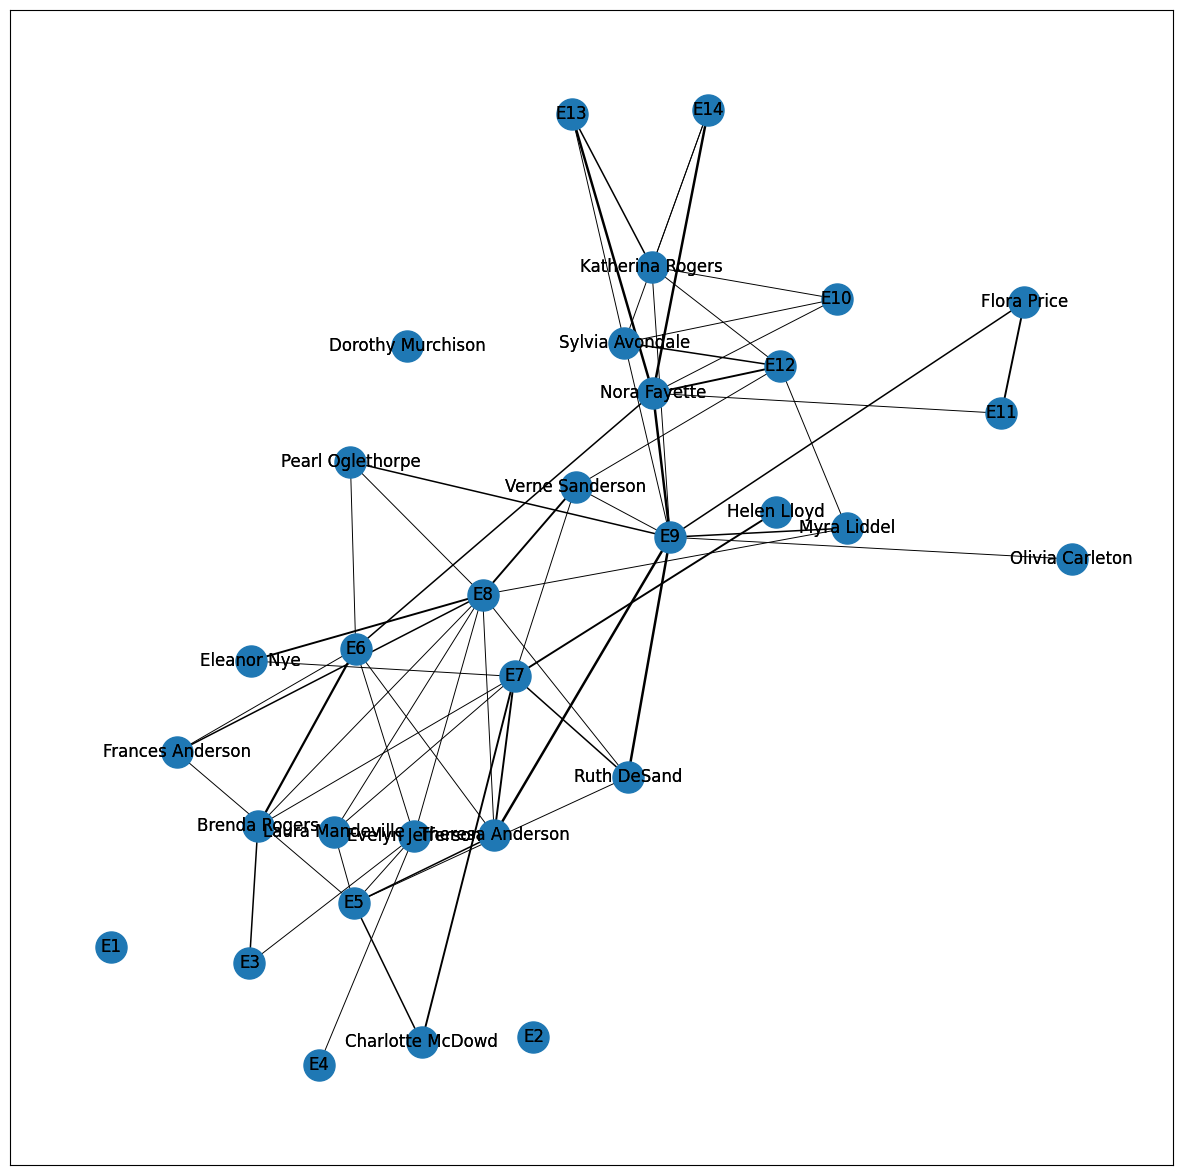

In [28]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(g, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(g, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

plt.figure(figsize=(15,15))
pos = nx.spring_layout(g, seed=648)  # Seed layout for reproducible node positions
weights = [math.log(edata['weight']) for f, t, edata in W.edges(data = True)]
nx.draw_networkx(g, pos, with_labels=True, node_size =  500, width = weights)
nx.draw_networkx_labels(g, pos)
plt.show()

### Calculating Degree Centrality
Degree centrality measures how many connections each node has in the network. It tells us how central or popular each person or event is based on the number of connections they have.

#### Centrality of Women:
For the women, the degree centrality tells us how many events each woman attended compared to the total possible connections. A higher centrality value means the woman attended more events.

#### Centrality of Events:
For the events, the degree centrality tells us how many women attended each event compared to the total possible connections. A higher centrality value means the event was attended by more women.

In [29]:
degree_centrality = nx.bipartite.degree_centrality(g, women)

women = pd.DataFrame(women)
women['centrality'] = women[0].map(degree_centrality)

women = women.sort_values(by = 'centrality', ascending = False)

clubs = pd.DataFrame(clubs)
clubs['centrality'] = clubs[0].map(degree_centrality)

clubs = clubs.sort_values(by = 'centrality', ascending = False)

display(women)
display(clubs)

,0,centrality
3,Nora Fayette,0.571429
7,Theresa Anderson,0.571429
12,Evelyn Jefferson,0.571429
17,Brenda Rogers,0.500000
5,Laura Mandeville,0.500000
13,Sylvia Avondale,0.500000
1,Katherina Rogers,0.428571
15,Helen Lloyd,0.357143
11,Frances Anderson,0.285714
16,Eleanor Nye,0.285714


,0,centrality
7,E8,0.777778
8,E9,0.666667
6,E7,0.555556
4,E5,0.444444
5,E6,0.444444
2,E3,0.333333
11,E12,0.333333
9,E10,0.277778
3,E4,0.222222
10,E11,0.222222


## Interpretations

Based on the analyses above, we can see that the women are all well-connected with each other , and typically attend the same events. The nodal network above shows us that events 8 and 9 are the most highly weighted and they appear to have the most connections. The bipartite degree centrality charts indicate that Evelyn and Nora have the most connections in this network, whereas Dorothy, Olivia, and Flora have the fewest connections. In addition, to confirm the findings in the nodal network graph, we can see, based on the degree centrality, that events 8 and 9 have the most connections.